Classification

In [748]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [749]:
df = pd.read_csv('../00_Data/06_CorrelationDrop.csv')
df.head()

,Gender,Term Sub Reason,Location,Age Bucket,Manager ID,Talent,Department,active_months
0,1,1,1,2,102292,5,2,59.0
1,1,1,1,2,100411,5,3,4.0
2,0,1,1,2,102304,5,5,26.0
3,0,1,1,4,102324,5,7,126.0
4,0,11,1,3,100619,5,7,126.0


<Axes: >

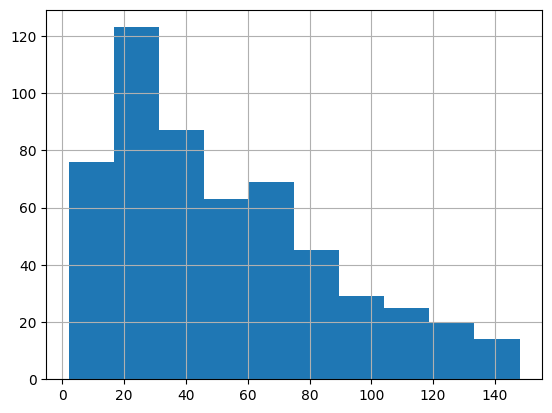

In [750]:
df['active_months'].hist()

Categories <br>
1. Short-Term <4 years => 48
2. Middle-Term  4 to 8 years
3. Long-Term  >8

In [751]:
def classify_active_months(num):
    """Classification of Active Months"""

    if num < 24:
        value = 'ST1'
    elif num<48:
        value = 'ST2'
    elif num < 60:
        value = 'MT1'
    elif num < 96:
        value = 'MT2'
    elif num < 108:
        value = 'LT1'
    else:
        value = 'LT2'
    
    return value

In [752]:
df['active_months'] = df['active_months'].apply(lambda x: classify_active_months(x))
df.head()

,Gender,Term Sub Reason,Location,Age Bucket,Manager ID,Talent,Department,active_months
0,1,1,1,2,102292,5,2,MT1
1,1,1,1,2,100411,5,3,ST1
2,0,1,1,2,102304,5,5,ST2
3,0,1,1,4,102324,5,7,LT2
4,0,11,1,3,100619,5,7,LT2


In [753]:
df['active_months'].unique()

array(['MT1', 'ST1', 'ST2', 'LT2', 'MT2', 'LT1'], dtype=object)

Building K-Nearest Neighbour Model

In [754]:
df.head()

,Gender,Term Sub Reason,Location,Age Bucket,Manager ID,Talent,Department,active_months
0,1,1,1,2,102292,5,2,MT1
1,1,1,1,2,100411,5,3,ST1
2,0,1,1,2,102304,5,5,ST2
3,0,1,1,4,102324,5,7,LT2
4,0,11,1,3,100619,5,7,LT2


In [755]:
# Split Feature and Target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [756]:
# Split Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [757]:
# Standardization
scaler = StandardScaler()
XS_train = scaler.fit_transform(X_train.values)
XS_test = scaler.transform(X_test.values)

In [758]:
# Model Building
model = KNeighborsClassifier(n_neighbors=5)
model.fit(XS_train, y_train)

KNeighborsClassifier()

Training Evaluation

In [759]:
y_pred = model.predict(XS_train)

In [760]:
# Evaluation Metrics
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         LT1       0.28      0.35      0.31        20
         LT2       0.48      0.54      0.51        37
         MT1       0.41      0.24      0.31        37
         MT2       0.48      0.58      0.52        88
         ST1       0.47      0.50      0.48        90
         ST2       0.66      0.54      0.59       113

    accuracy                           0.50       385
   macro avg       0.46      0.46      0.45       385
weighted avg       0.51      0.50      0.50       385



In [761]:
model.score(XS_train, y_train)

0.5012987012987012

Testing Evaluation

In [762]:
y_pred = model.predict(XS_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         LT1       0.07      0.25      0.11         4
         LT2       0.29      0.38      0.32        16
         MT1       0.18      0.13      0.15        15
         MT2       0.26      0.26      0.26        39
         ST1       0.26      0.36      0.30        33
         ST2       0.51      0.31      0.38        59

    accuracy                           0.30       166
   macro avg       0.26      0.28      0.26       166
weighted avg       0.34      0.30      0.30       166



In [763]:
model.score(XS_test, y_test)

0.29518072289156627